In [17]:
%reset -f
import pandas as pd
import numpy as np
import copy
from collections import deque
from pandas.core.frame import DataFrame
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [18]:
mu, sigma = 10, 5
s1 = st.norm(mu, sigma).rvs(10000)
s2 = st.norm(mu-4, sigma+4).rvs(1000)

df_1 = pd.DataFrame(s1,columns=["feat"]  )
df_1['Y'] = 0
df_2 = pd.DataFrame(s2,columns=["feat"]  )
df_2['Y'] = 1

df = pd.concat([df_1,df_2],axis=0).reset_index(drop=True)

df.head(5)

,feat,Y
0,9.391692,0
1,6.176612,0
2,4.890970,0
3,5.142916,0
4,-1.834093,0


In [19]:
feature_cols = [col for col in df.columns if col != 'Y']
target_cols = [col for col in df.columns if col not in feature_cols]


Input two df to expolore them..

In [20]:
def plot_feature_distribution(df1, df2, label1, label2, features,plot_rows,plot_cols):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,1,figsize=(12,10))

    for feature in features:
        i += 1
        plt.subplot(plot_rows,plot_cols,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

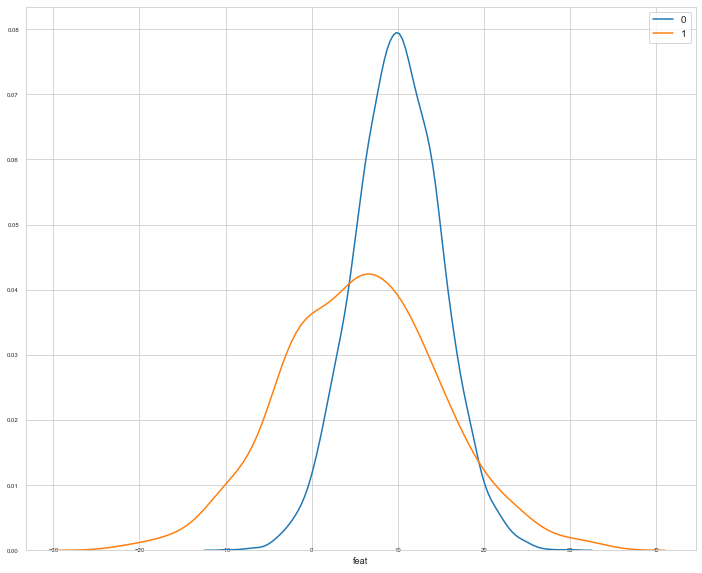

In [21]:
t0 = df.loc[df['Y'] == 0]
t1 = df.loc[df['Y'] == 1]
#features = df.columns.values[0]
plot_feature_distribution(t0, t1, '0', '1', feature_cols,1,1)

CDF Main function : return CDF dataframe

In [22]:
def CDF_func(dataframe,feature,start,end,step,FileName):
    #initial
    N = len(dataframe[feature])
    seq = dataframe[feature].sort_values().reset_index(drop=True)
    cdf_range = range(start,end,step)

    tmp_cdframe = pd.DataFrame(
            [sum(seq<value)/N for value in cdf_range],columns=['cdf'])
    tmp_cdframe.index = cdf_range
    
    globals()['cdf_frame_'+str(FileName)] = tmp_cdframe
    print("Done!File Name: cdf_frame_"+ str(FileName))

In [33]:
CDF_func(df[df['Y']==1],'feat',int(min(df['feat']))-2,int(max(df['feat']))+2,1,'feat_1')
CDF_func(df[df['Y']==0],'feat',int(min(df['feat']))-2,int(max(df['feat']))+2,1,'feat_0')

Done!File Name: cdf_frame_feat_1
Done!File Name: cdf_frame_feat_0


In [34]:
cdf_frame_feat_1

,cdf
-24,0.000
-23,0.000
-22,0.001
-21,0.002
-20,0.003
-19,0.004
-18,0.005
-17,0.007
-16,0.009
-15,0.012


In [35]:
cdf_frame_feat_0

,cdf
-24,0.0000
-23,0.0000
-22,0.0000
-21,0.0000
-20,0.0000
-19,0.0000
-18,0.0000
-17,0.0000
-16,0.0000
-15,0.0000


In [36]:
cdf_frame_feat_1-cdf_frame_feat_0

,cdf
-24,0.0000
-23,0.0000
-22,0.0010
-21,0.0020
-20,0.0030
-19,0.0040
-18,0.0050
-17,0.0070
-16,0.0090
-15,0.0120


In [37]:
np.where(cdf_frame_feat_1-cdf_frame_feat_0>0.1)

(array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [38]:
np.where(cdf_frame_feat_1-cdf_frame_feat_0>0.1)[0]

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36], dtype=int64)

找出差異最大的區間

In [39]:
cdf_diff = cdf_frame_feat_1-cdf_frame_feat_0
cdf_frame_feat_1.index[np.where(cdf_diff>0.1)[0]]
#找出差異最大的區間

Int64Index([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

Feature

In [40]:
df['cdf_diff_feat']=cdf_diff.loc[round(df['feat'])].reset_index(drop=True)

In [41]:
df.head(10)

,feat,Y,cdf_diff_feat
0,9.391692,0,0.2139
1,6.176612,0,0.2952
2,4.890970,0,0.3046
3,5.142916,0,0.3046
4,-1.834093,0,0.1889
5,11.519653,0,0.1039
6,11.887063,0,0.1039
7,18.256969,0,-0.0325
8,9.125312,0,0.2139
9,14.071366,0,0.0346
